## Generate random numbers in range $[0,\pi]$ whose PDF is of the form $f(x)=\frac{\sin(x)}{2}$

Solve for CDF:
$$
F(x)=\left\{ \begin{aligned}&0, &\quad x<0\\
&\frac{1-\cos x}{2}, &0\le x\le \pi\\
&1, &x>1
\end{aligned}
\right.
$$
then let $0\le r \le 1$ be a uniformly distributed random number in range $[0,1]$,
$$x=F^{-1}(r)=\arccos (1-2r）$$
then we can generate the samples using this formula.

In [12]:
import numpy as np
import numpy.random as random
import math
import matplotlib.pyplot as plt
# set seed
random.seed(42)
sampleSize=1000000
r=random.random(sampleSize)
def inverseF(x):
    return np.arccos(1-2*x)
x=inverseF(r)

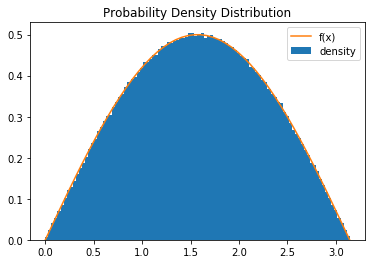

In [13]:
slices=100
plt.figure()
plt.hist(x,bins=slices,range=(0,np.pi),density=True)
y=np.linspace(0,np.pi)
plt.plot(y,np.sin(y)/2)
plt.legend(["f(x)","density"])
plt.title("Probability Density Distribution");

## Simulate the establishment of Maxwell distribution through collisions.

In [14]:
def collision(v1,v2):
    vc=(v1+v2)/2
    delta=np.linalg.norm((v1-v2)/2)
    # v2=vc-delta, v1=vc+delta
    unit=randomVector()*delta
    return (vc+unit,vc-unit)

# generates a random unit vector by generating its theta and phi
def randomVector():
    theta=random.uniform(0,np.pi)
    phi=random.uniform(0,np.pi*2)
    return np.array([math.sin(theta)*math.cos(phi),math.sin(theta)*math.sin(phi),math.cos(theta)])

# draw the correct Maxwell Distribution.
def MaxwellSpeedDistribution(x):
    return math.sqrt(2/math.pi)*x*x*np.exp(-x*x/2)

def MaxwellVelocityDistribution(x):
    return math.sqrt(1/2/math.pi)*np.exp(-x*x/2)

In [15]:
# First generate uniformly distributed samples at temperature T.
# They have all already been normalized. Let v=sqrt(k*T/m) be the unit.
samples=10000
# each row represents a particle's velocity components.
particles=np.zeros((samples,3))
for i in range(samples):
    particles[i]=randomVector()*math.sqrt(3)
# # renormalize based on the rms velocity.
# vrms=math.sqrt(np.mean(np.linalg.norm(particles,axis=1)**2))
# particles=particles/(vrms/math.sqrt(3))

In [32]:
# points where the distributions should be drawn, labeled by the number of collisions.
drawPoint=[10,1000,3000,5000,8000,10000,20000,30000,50000,80000,100000]
data=[]
for i in range(max(drawPoint)):
    j,k=random.randint(0,samples,2)
    particles[j],particles[k]=collision(particles[j],particles[k])
    if i+1 in drawPoint:
        data.append((np.copy(particles),i+1))        

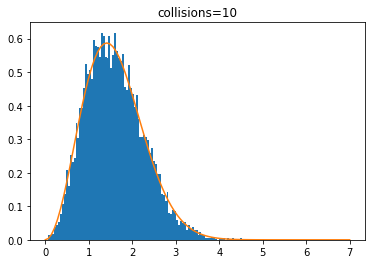

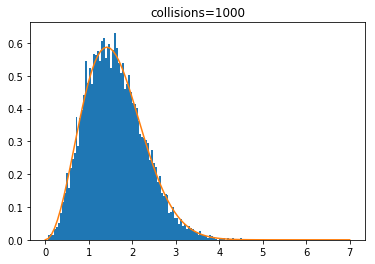

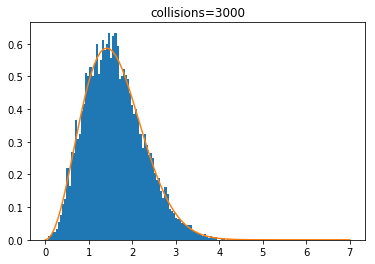

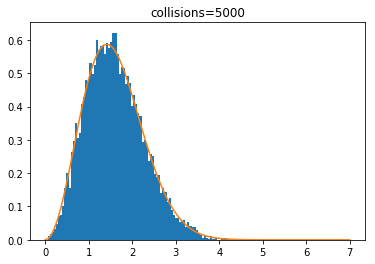

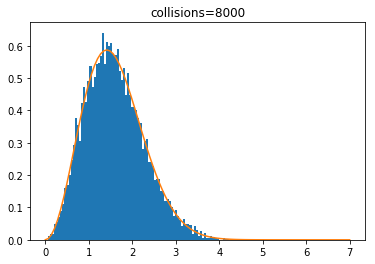

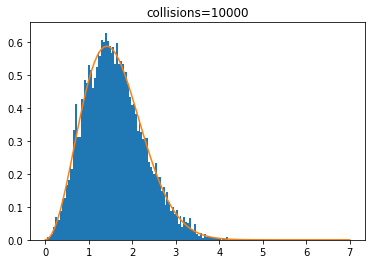

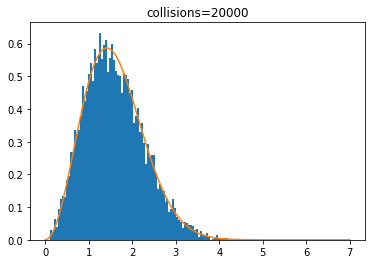

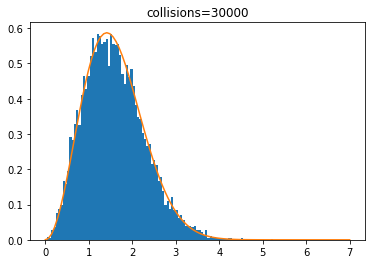

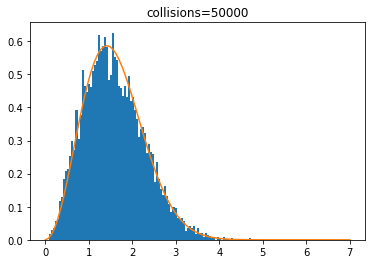

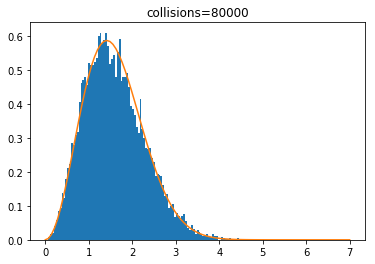

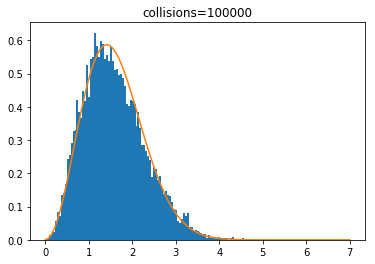

In [34]:
# draw the histogram of velocity
slices=100
vrmsList=[]
for pair in data:
    v,count=pair
    speed=np.linalg.norm(v,axis=1)
    plt.figure()
    plt.title("collisions={}".format(count))
    plt.hist(speed,bins=slices,density=True)
    x=np.linspace(0,7,slices)
    plt.plot(x,MaxwellSpeedDistribution(x))
    vrms=(np.mean(np.linalg.norm(v,axis=1)**2))
    vrmsList.append(vrms)

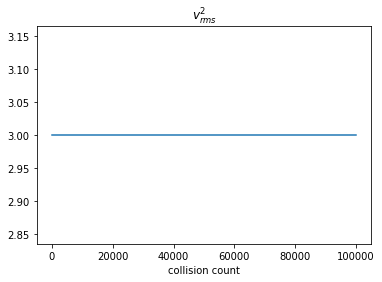

In [38]:
# verify that the energy is conserved.
plt.figure()
plt.title("$v_{rms}^2$")
plt.xlabel("collision count")
plt.plot([pair[1] for pair in data],vrmsList)

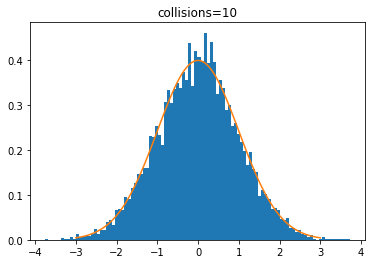

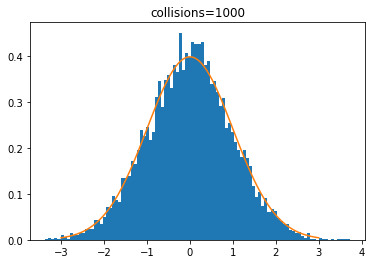

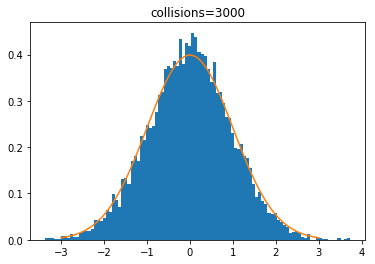

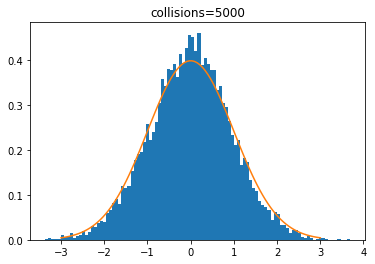

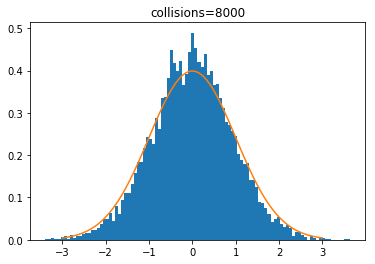

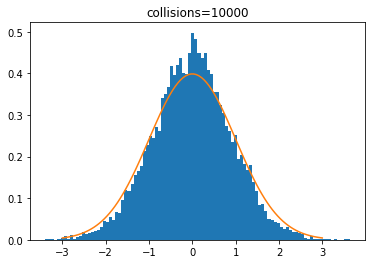

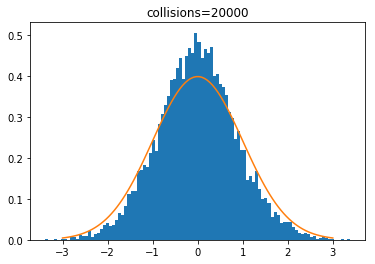

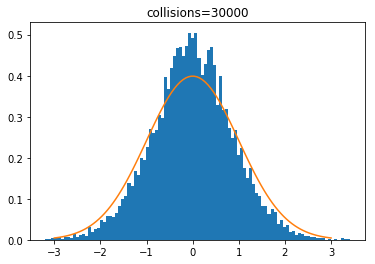

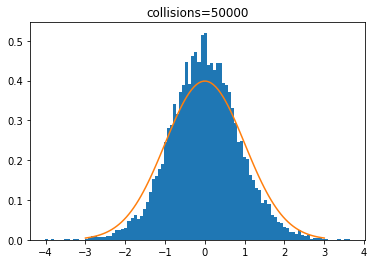

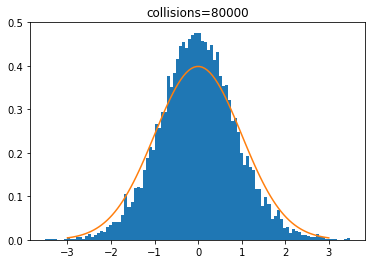

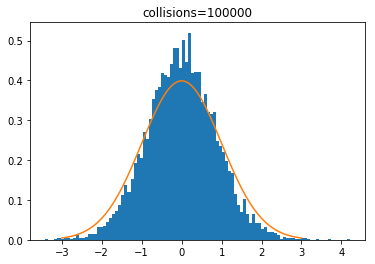

In [25]:
# draw the histogram of velocity components
for pair in data:
    v,count=pair
    vx=v[:,0]
    plt.figure()
    plt.title("collisions={}".format(count))
    plt.hist(vx,bins=slices,density=True)
    x=np.linspace(-3,3,slices)
    plt.plot(x,MaxwellVelocityDistribution(x))


As we can see from the results, though the speed distribution is in good agreement with the standard Maxwell distribution and the energy is well conserved, the velocity distribution slightly deviates from the normal distribution. That is because the vectors are not generated uniformly on the sphere. We should correct the function in this way, that the cosine of theta, rather than theta itself is distributed evenly.

In [26]:
def randomUnitVector():
    cosine=random.uniform(-1,1)
    phi=random.uniform(0,2*math.pi)
    theta=math.acos(cosine)
    return np.array([math.sin(theta)*math.cos(phi),math.sin(theta)*math.sin(phi),math.cos(theta)])

def collisionCorrected(v1,v2):
    vc=(v1+v2)/2
    delta=np.linalg.norm((v1-v2)/2)
    # v2=vc-delta, v1=vc+delta
    unit=randomUnitVector()*delta
    return (vc+unit,vc-unit)

Now do the simulations again.

In [ ]:
# each row represents a particle's velocity components.
particles=np.zeros((samples,3))
for i in range(samples):
    particles[i]=randomVector()*math.sqrt(3)
# # renormalize based on the rms velocity.
# vrms=math.sqrt(np.mean(np.linalg.norm(particles,axis=1)**2))
# particles=particles/(vrms/math.sqrt(3))

vrmsList=[]
for i in range(max(drawPoint)):
    j,k=random.randint(0,samples,2)
    particles[j],particles[k]=collisionCorrected(particles[j],particles[k])
    if i+1 in drawPoint:
        # draw the histogram of velocity
        slices=100
        speed=np.linalg.norm(particles,axis=1)
        plt.figure()
        plt.subplot(1,2,1)
        plt.title("speed distribution\ncollisions={}".format(i+1))
        plt.hist(speed,bins=slices,density=True)
        x=np.linspace(0,7,slices)
        plt.plot(x,MaxwellSpeedDistribution(x))

        # draw the histogram of velocity components
        plt.subplot(1,2,2)
        vx=particles[:,0]
        plt.title("velocity distribution\ncollisions={}".format(i+1))
        plt.hist(vx,bins=slices,density=True)
        x=np.linspace(-3,3,slices)
        plt.plot(x,MaxwellVelocityDistribution(x))
        vrms=(np.mean(np.linalg.norm(v,axis=1)**2))
        vrmsList.append((vrms,i+1))
        

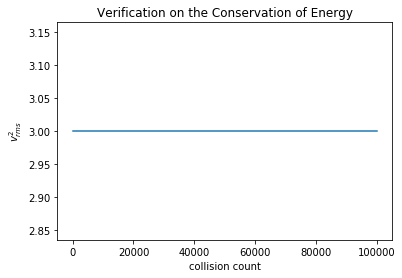

In [41]:
plt.figure()
plt.title("Verification on the Conservation of Energy")
plt.ylabel("$v_{rms}^2$")
plt.xlabel("collision count")
plt.plot([counts for (vrms, counts) in vrmsList],[vrms for (vrms, counts) in vrmsList])

Now that the curves fit nicely, we can try something else. The experiment above used an initial set of sampling particles all with the same speed and an isotropic distribution. We can also try on a uniformly distributed speed with isotropic distribution.

v root mean square=1.731920903217003


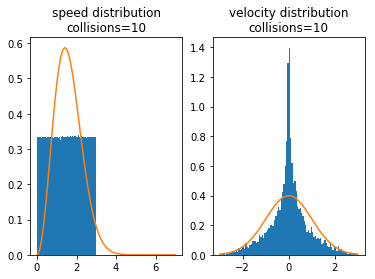

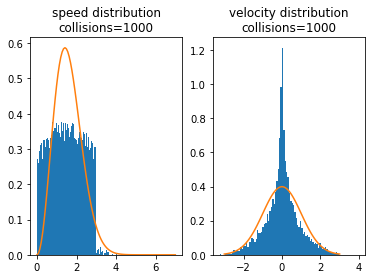

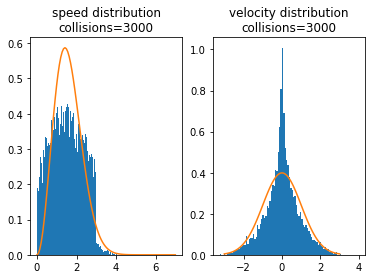

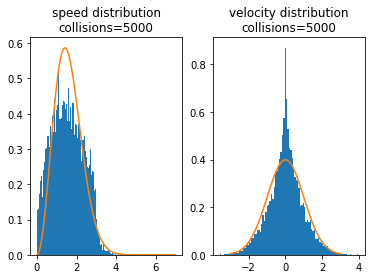

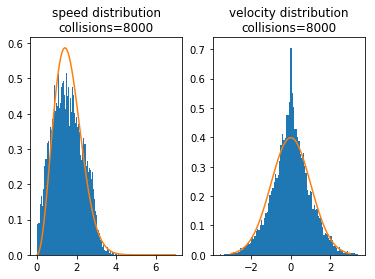

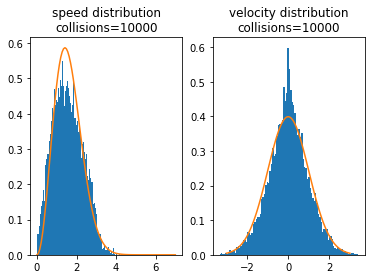

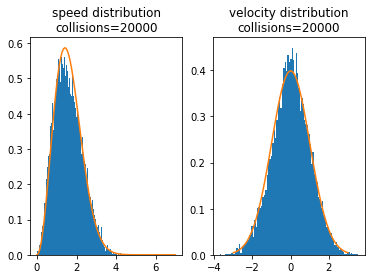

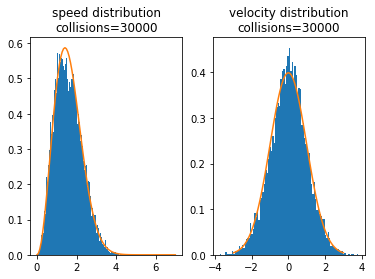

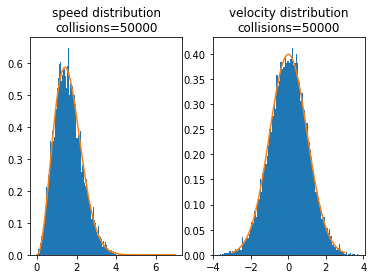

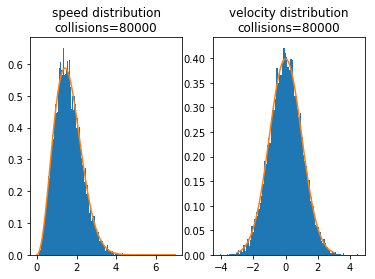

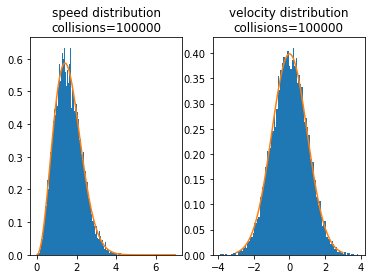

In [42]:
# each row represents a particle's velocity components.
particles=np.zeros((samples,3))
for i in range(samples):
    particles[i]=randomVector()*3*i/samples
# renormalize based on the rms velocity.
vrms=math.sqrt(np.mean(np.linalg.norm(particles,axis=1)**2))
print("v root mean square={}".format(vrms)) # should be about sqrt(3), which is 1.732
particles=particles/(vrms/math.sqrt(3))

vrmsList=[]
for i in range(max(drawPoint)):
    j,k=random.randint(0,samples,2)
    particles[j],particles[k]=collisionCorrected(particles[j],particles[k])
    if i+1 in drawPoint:
        # draw the histogram of velocity
        slices=100
        speed=np.linalg.norm(particles,axis=1)
        plt.figure()
        plt.subplot(1,2,1)
        plt.title("speed distribution\ncollisions={}".format(i+1))
        plt.hist(speed,bins=slices,density=True)
        x=np.linspace(0,7,slices)
        plt.plot(x,MaxwellSpeedDistribution(x))

        # draw the histogram of velocity components
        plt.subplot(1,2,2)
        vx=particles[:,0]
        plt.title("velocity distribution\ncollisions={}".format(i+1))
        plt.hist(vx,bins=slices,density=True)
        x=np.linspace(-3,3,slices)
        plt.plot(x,MaxwellVelocityDistribution(x))
        vrms=(np.mean(np.linalg.norm(v,axis=1)**2))
        vrmsList.append((vrms,i+1))


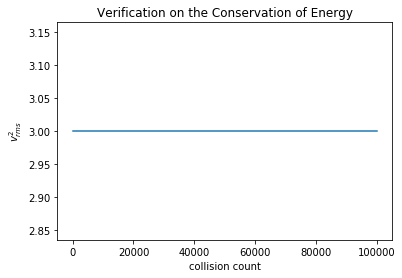

In [41]:
plt.figure()
plt.title("Verification on the Conservation of Energy")
plt.ylabel("$v_{rms}^2$")
plt.xlabel("collision count")
plt.plot([counts for (vrms, counts) in vrmsList],[vrms for (vrms, counts) in vrmsList])

We can safely conclude that regardless of the initial conditions of speed distribution, as long as they are isotropic and have a rms velocity of $\sqrt{3}$ (after normalization), an equilibrium of Maxwell distribution can be established through collisions.